# Evaluate the effect of water vapor on radiative forcings

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
os.chdir('C:\\Users\\cd7\\Desktop\\watervapor')

Read two excel spreadsheets and import data

In [2]:
df1 = pd.read_excel('waterdata.xlsx', 'methane_water')

In [3]:
yrs = df1.iloc[:,0:1]
mlist = df1.iloc[:,1:2]
waterlist = df1.iloc[:,2:3]

In [4]:
f0 = 0.47
f1 = 0.0000201
f2 = 5.31*10**-15
e1 = 0.75
e2 = 1.52
alpha = 5.35
beta = 0.036
eps = 0.12
c0 = 278
m0  = mlist.iloc[0] # m0=722
m0 = float(m0)
# print (type(m0))
n0 = 270
print (m0)

742.579604911905


In [5]:
def fch4(m):
    y = f0*np.log(1 + f1 *(m *n0)**e1 + f2 *m* (m* n0)**e2)
    return y
f00 = fch4(m0)

def ch4raw(m):
    y = beta *(np.sqrt(m) - np.sqrt(m0)) - (fch4(m) - f00)
    return y
ch40 = eval('ch4raw(mlist)')

In [6]:
df2 = pd.merge(ch40,waterlist, left_index =True, right_index =True,how='outer')
ch40 = df2.iloc[:,0]
ch40 = ch40.tolist()
waterlist = df2.iloc[:,1]
waterlist = waterlist.tolist()

In [7]:
def linear(x,a):
     y = a*x
     return y
param_bounds=(0,1)
popt,pcov = curve_fit(linear,ch40, waterlist, bounds=param_bounds)
print (popt)

[0.14960033]


Plot figures

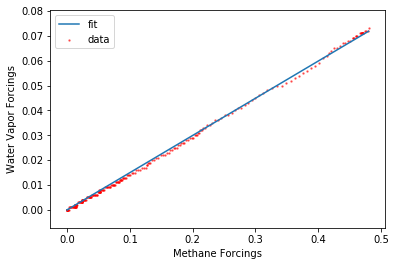

In [8]:
x = np.array(ch40)
y = linear(x, *popt)
plt.scatter(ch40, waterlist, s=2,c='r',alpha = 0.5, label="data",marker='o')
plt.plot(x,y,label='fit')
plt.xlabel('Methane Forcings')
plt.ylabel('Water Vapor Forcings')
plt.legend(loc='best')
plt.savefig('water.eps',dpi=1000)
plt.savefig('water.pdf',dpi=1000)
plt.show()

In [9]:
print (df2)

     CH4_Concentration(ppb)  H2O (Strat)
0                  0.000000        0.000
1                 -0.000246        0.000
2                 -0.000369        0.000
3                 -0.000308        0.000
4                 -0.000184        0.000
5                  0.000000        0.000
6                  0.000246        0.000
7                  0.000553        0.000
8                  0.000983        0.000
9                  0.001413        0.000
10                 0.001965        0.000
11                 0.002579        0.000
12                 0.003253        0.001
13                 0.004048        0.001
14                 0.004905        0.001
15                 0.005882        0.001
16                 0.006859        0.001
17                 0.007834        0.001
18                 0.008808        0.001
19                 0.009781        0.001
20                 0.010692        0.001
21                 0.011481        0.001
22                 0.012209        0.001
23              

In [10]:
# print (len(ch40))
# print (ch40[0])
# print (ch40)
# a =[]
a = np.zeros((262, 1))
for i in range(0,len(ch40)):
    a[i] = ch40[i]*waterlist[i]
numerator = sum(a)
print (numerator)

b = np.zeros((262, 1))
for i in range(0,len(ch40)):
    b[i] = ch40[i]*ch40[i]
denominator = sum(b)
print (denominator)
print (numerator/denominator)

# c = np.zeros((262,1))
# for i in range(0,len(ch40)):
#     c[i] = waterlist[i]/ch40[i]
# fitt = sum(c)
# # print (fitt/262)


[1.65838186]
[11.0854159]
[0.14960033]
